In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [10]:
filepath = "../../data/datasets_374074_727250_USA_Housing.csv"
data = np.loadtxt(filepath,delimiter=',',skiprows=1)
print(data.shape)

(5000, 6)


In [34]:
x_total = data[:,:5]
y_total = data[:,5]

x_total = preprocessing.scale(x_total)
y_total = preprocessing.scale(y_total)

x_train = x_total[:4000]
x_test = x_total[4000:]
y_train = y_total[:4000]
y_test = y_total[4000:]
print(x_train.shape)

(4000, 5)


### Normal Equation

In [30]:
X_train = np.hstack([x_train,np.ones((x_train.shape[0],1))])
weight = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train),X_train)),np.transpose(X_train)),y_train)
print(weight)

X_test = np.hstack([x_test,np.ones((x_test.shape[0],1))])
y_pred = np.dot(X_test,weight)


loss = np.sqrt(np.square(y_pred - y_test).mean())
print("rmse_loss:",loss)

[0.65361133 0.46378742 0.34520317 0.00353179 0.42506886 0.00270682]
rmse_loss: 0.28904225054224564


### sklearn

In [31]:
from sklearn  import linear_model

In [32]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
loss = np.sqrt(np.square(y_pred - y_test).mean())
print("rmse_loss:",loss)

rmse_loss: 0.28904225054224564


In [35]:
def shuffle_aligned_list(data):
    num = data[0].shape[0]
    shuffle_index = np.random.permutation(num)
    return [d[shuffle_index] for d in data]

def batch_generator(data, batch_size, shuffle=True):
    batch_count = 0
    while True:
        if batch_count * batch_size + batch_size >= data[0].shape[0]:
            batch_count = 0
            if shuffle:
                data = shuffle_aligned_list(data)
        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        yield [d[start:end] for d in data]

### gradient descent

mse_loss: 0.28878914008243806


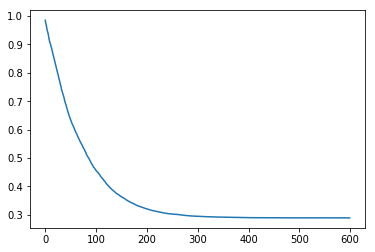

In [43]:
num_epoch = 600
batch_size = 40
learning_rate = 0.01


def mse(y_pred, y):
    return np.sqrt(np.square(y_pred - y_test).mean())

weight = np.zeros(6)
np.random.seed(0)
batch_g = batch_generator([x_train, y_train], batch_size, shuffle=True)
X_test = np.hstack([x_test,np.ones((x_test.shape[0],1))])

loss_list = []
for i in range(num_epoch):
    y_pred = np.dot(X_test,weight)
    loss = mse(y_pred,y_test)
    loss_list.append(loss)
    
    x_batch, y_batch = batch_g.__next__()
    x_batch = np.hstack([x_batch,np.ones([x_batch.shape[0],1])])
    y_pred = np.dot(x_batch, weight)
    gradient = (x_batch * np.tile((y_pred - y_batch).reshape([-1,1]),6)).mean(axis=0)
    weight = weight - learning_rate * gradient

    
print("mse_loss:",loss)
plt.plot(np.arange(num_epoch),loss_list)
plt.show()
    